# Exploratory Data Analysis (EDA)
**EDA (Exploratory Data Analysis)** is a crucial step in the data analysis process. It involves `analyzing and visualizing` data sets to understand their main characteristics, often with the help of `summary statistics` and `graphical representations`. The primary goals of EDA are to:
- Identify patterns, trends, and relationships within the data.
- Detect anomalies or outliers that may affect analysis.
- Test hypotheses and assumptions about the data.
Here are some common techniques and tools used in EDA:
1. **Summary Statistics**: Calculating measures such as mean, median, mode, standard deviation, and percentiles to summarize the data.
2. **Data Visualization**: Creating plots and charts such as histograms, box plots,
    scatter plots, and bar charts to visualize data distributions and relationships.
3. **Data Cleaning**: Identifying and handling missing values, duplicates, and inconsistencies in the data.
4. **Correlation Analysis**: Examining relationships between variables using correlation coefficients and heatmaps.
5. **Dimensionality Reduction**: Techniques like PCA (Principal Component Analysis) to reduce the number of variables while retaining important information.
6. **Time Series Analysis**: For time-dependent data, analyzing trends, seasonality, and cycles.
EDA is an iterative process that helps analysts and data scientists gain insights into the data, guiding further analysis and modeling efforts.

------------------------------------------------------------------------------------------------------------

# Time Series Analysis vs. Time Series Forecasting
**Time Series Data** is a sequence of data points collected or recorded at successive points in time, often at uniform intervals.

**Time Series Analysis** involves methods for analyzing time series data to extract meaningful statistics and other characteristics of the data.

**Time Series Forecasting** is a technique used to `predict future values based on previously observed values in a time-ordered sequence`.
One of the most widely used methods for time series forecasting is the ARIMA model, which stands for AutoRegressive Integrated Moving Average.

Difference between Time Series Analysis and Time Series Forecasting:
| Aspect                     | Time Series Analysis                                      | Time Series Forecasting                                  |
|----------------------------|-----------------------------------------------------------|---------------------------------------------------------|
| Purpose                    | To understand the underlying patterns and characteristics of the data. | To predict future values based on historical data.          |
| Techniques Used            | Decomposition, Smoothing, Autocorrelation Analysis, etc. | ARIMA, Exponential Smoothing, Prophet, etc.                     |
| Outcome                    | Insights into trends, seasonality, and cycles.            | Forecasted values for future time periods.               |
| Focus                      | Historical data analysis.                                 | Future data prediction.                                    |
| Data Requirement            | Requires historical time series data.                     | Requires historical time series data for training.       |
| Application Areas          | Economic analysis, climate studies, stock market analysis. | Sales forecasting, inventory management, demand planning. |



-------------------------------------------------------------------------------------------------------------

In [1]:
import yfinance  as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = yf.download("TSLA", start="2020-01-01", end="2025-01-01", auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1258 non-null   float64
 1   (High, TSLA)    1258 non-null   float64
 2   (Low, TSLA)     1258 non-null   float64
 3   (Open, TSLA)    1258 non-null   float64
 4   (Volume, TSLA)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [4]:
df.columns

MultiIndex([( 'Close', 'TSLA'),
            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

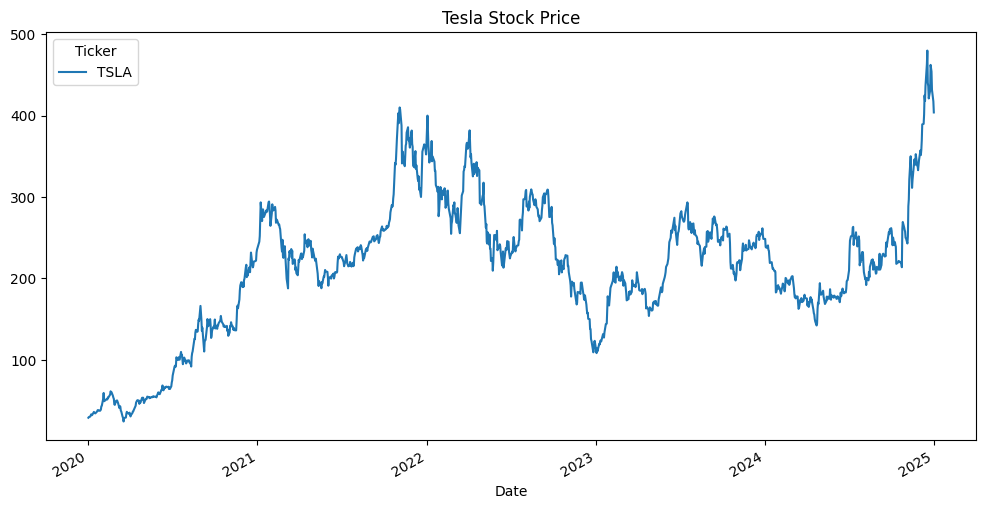

In [5]:
df['Close'].plot(figsize=(12, 6), title="Tesla Stock Price")

<Axes: title={'center': 'Tesla Stock Price'}, xlabel='Date'>

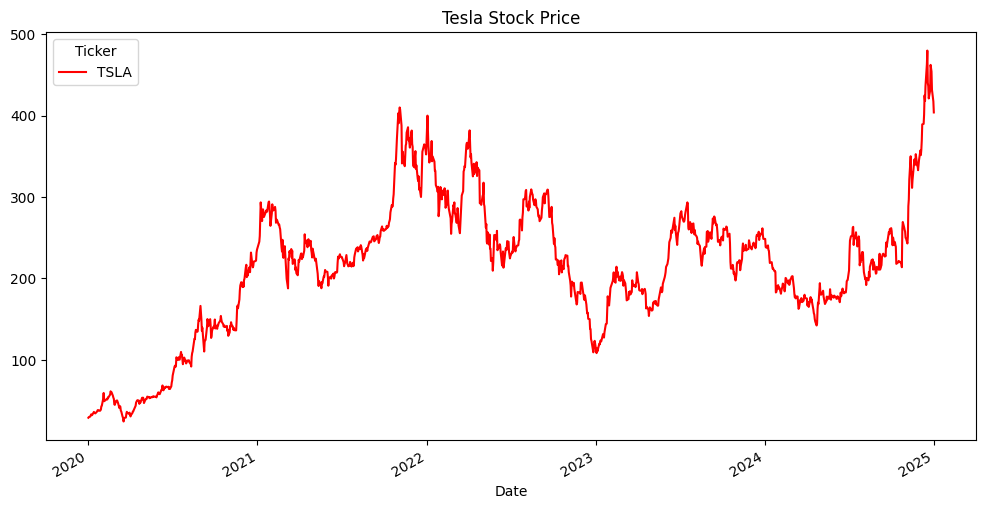

In [6]:
df['Close'].plot(figsize=(12, 6), title="Tesla Stock Price", color='red')

<Axes: title={'center': 'Tesla Stock Price in 2021'}, xlabel='Date'>

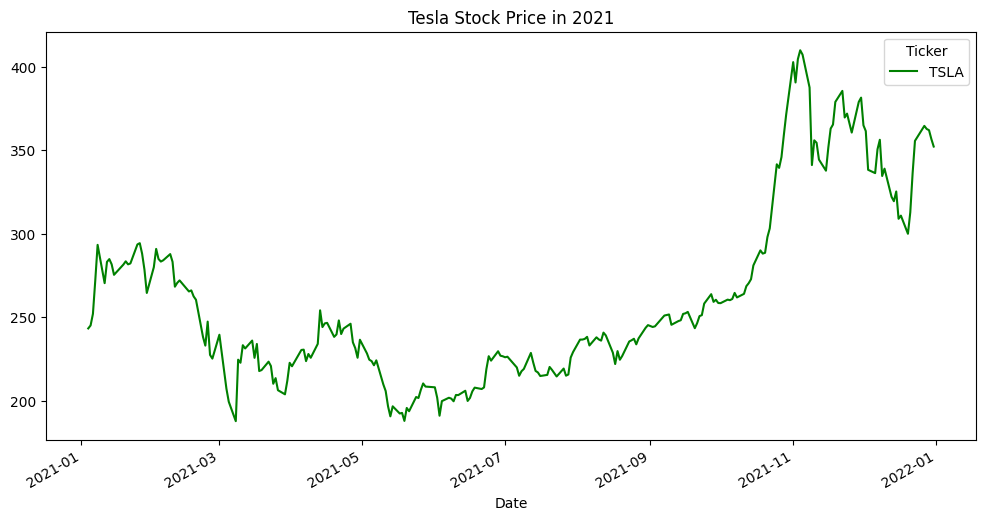

In [7]:
df['Close'].loc['2021-01-01':'2021-12-31'].plot(figsize=(12, 6), title="Tesla Stock Price in 2021", color='green')

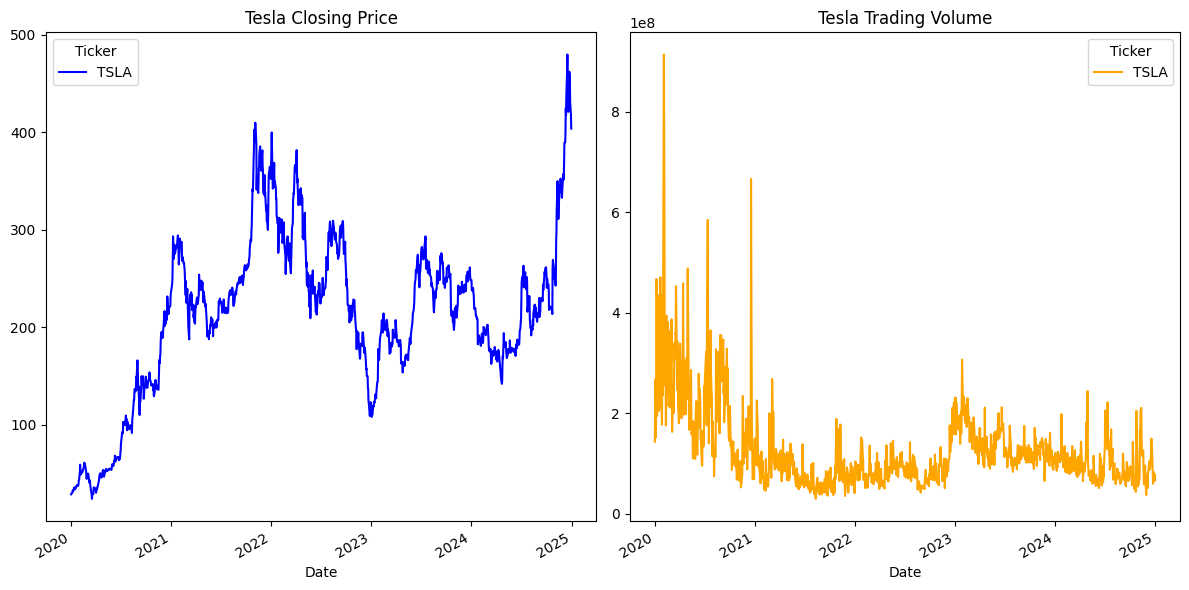

In [8]:
#Subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
df['Close'].plot(ax=ax[0], title="Tesla Closing Price", color='blue')
df['Volume'].plot(ax=ax[1], title="Tesla Trading Volume", color='orange')
plt.tight_layout()
plt.show()

In [9]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1258 non-null   float64
 1   (High, TSLA)    1258 non-null   float64
 2   (Low, TSLA)     1258 non-null   float64
 3   (Open, TSLA)    1258 non-null   float64
 4   (Volume, TSLA)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 91.3 KB


-------------------------------------------------------------------------------------------------------------

# Time Resampling
**Time Resampling** is the process of `changing the frequency of your time series data`. It can be done in two ways: downsampling and upsampling.

**Downsampling** is the process of reducing the frequency of your time series data. For example, you might want to convert daily data into monthly data by taking the average value for each month. This can be done using the `resample()` function in pandas.

**Upsampling** is the process of increasing the frequency of your time series data. For example, you might want to convert monthly data into daily data by filling in the missing values. This can also be done using the `resample()` function in pandas.
Here is an example of how to perform time resampling using pandas:

**Downsampling**\
monthly_data = df.resample('M').mean()

**Upsampling**\
daily_data = df.resample('D').ffill()

**Rules of Resampling**:
- When downsampling, you need to specify an aggregation function (e.g., mean, sum, max, min) to combine the data points.
- When upsampling, you need to specify a method for filling in the missing values (e.g., forward fill, backward fill, interpolation).

Resample Aliases:
| Alias | Description          |
|-------|----------------------|
| ME    | Month-end frequency  |
| MS    | Month-start frequency |
| Q     | Quarter-end frequency |
| QS    | Quarter-start frequency|
| AE    | Year-end frequency    |
| AS    | Year-start frequency   |

-------------------------------------------------------------------------------------------------------------

In [11]:
# Monthly average high price
df.resample('ME').mean()['High'].head()

Ticker,TSLA
Date,
2020-01-31,35.761904
2020-02-29,55.384035
2020-03-31,39.137181
2020-04-30,45.773460
2020-05-31,54.382400


<Axes: title={'center': 'Monthly Average High Price'}, xlabel='Date'>

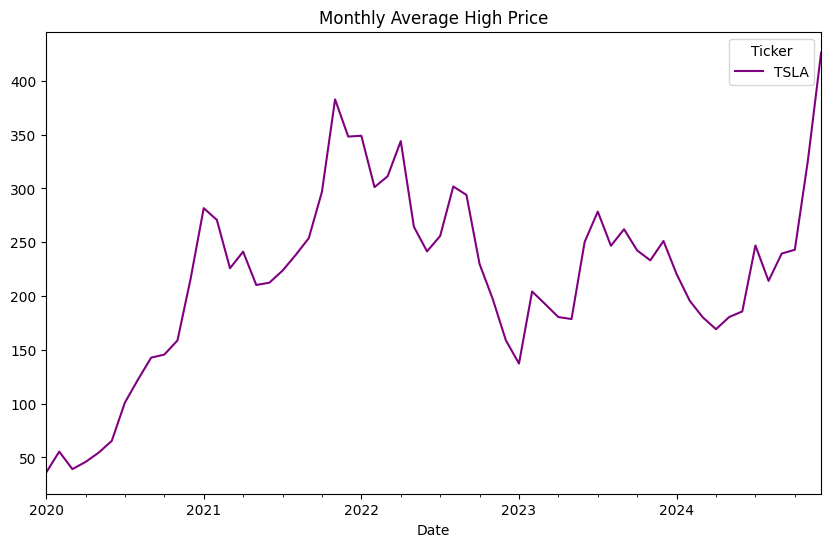

In [12]:
# Plotting Monthly Average High Price
df.resample('ME').mean()['High'].plot(figsize=(10, 6), title="Monthly Average High Price", color='purple')

In [13]:
# Yearly Maximum High Price
df.resample('YE').max()['High']

Ticker,TSLA
Date,
2020-12-31,239.573334
2021-12-31,414.496674
2022-12-31,402.666656
2023-12-31,299.290009
2024-12-31,488.540009


<Axes: title={'center': 'Yearly Maximum High Price'}, xlabel='Date'>

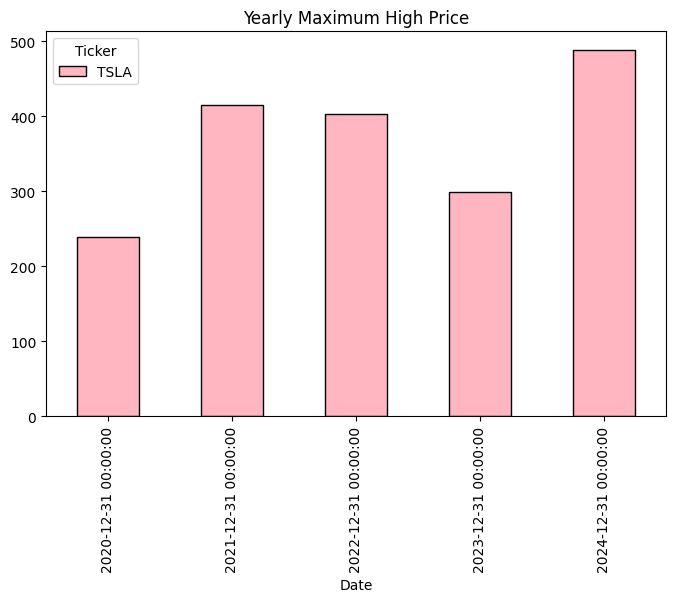

In [14]:
# Plotting Yearly Maximum High Price
df.resample('YE').max()['High'].plot(figsize=(8, 5), title="Yearly Maximum High Price", color='lightpink', edgecolor='black', kind='bar')

In [15]:
# Weekly Average Opening Price from Dec 31, 2021 to Apr 01, 2022
df.loc['2021-12-31': '2022-04-01']['Open'].resample('W').mean()

Ticker,TSLA
Date,
2022-01-02,357.813324
2022-01-09,376.088000
2022-01-16,350.764667
2022-01-23,339.532501
2022-01-30,302.420667
2022-02-06,301.021332
2022-02-13,305.487994
2022-02-20,298.325336
2022-02-27,264.515003


<Axes: title={'center': 'Weekly Average Opening Price (Dec 2021 - Apr 2022)'}, xlabel='Date'>

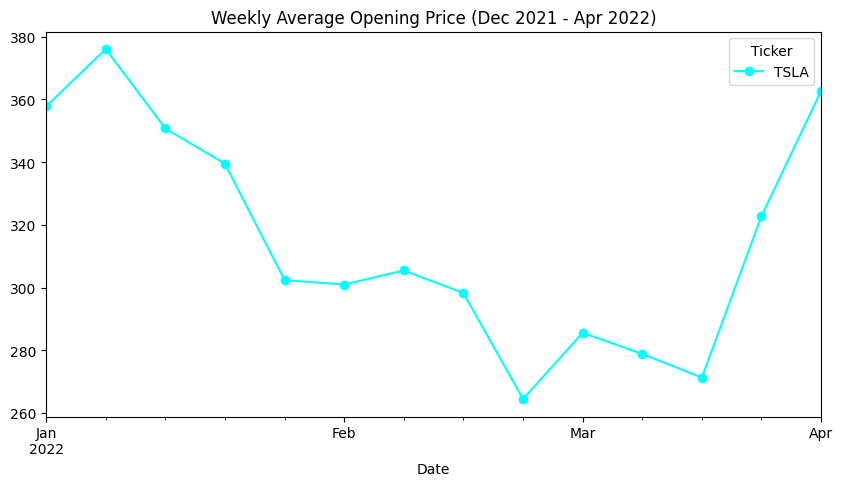

In [16]:
df.loc['2021-12-31': '2022-04-01']['Open'].resample('W').mean().plot(figsize=(10, 5), title="Weekly Average Opening Price (Dec 2021 - Apr 2022)", color='cyan', marker='o')

# Conclusion
In this notebook, I performed Time Series Exploratory Data Analysis (EDA) and demonstrated resampling techniques using Pandas. I explored key trends and patterns in time series data, visualized yearly maximum high prices, and calculated weekly average opening prices over specific periods. Additionally, I showcased how to effectively downsample and upsample time series data to derive meaningful insights for better decision-making.